<h2>現実の株価を取得し分析をする準備をおこなう</h2>

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdd

C:\Users\densu\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
stock_list = []

#直近1年間の株価を取得するために、今日の日付からtimedeltaで１年間ずらしたデータを生成
today = datetime.datetime.today()
before_y = today - datetime.timedelta(days= 365 * 3)

#その後変数の可読性を上げるため変数名を変更
start_date, end_date =before_y, today
financial_data = pd.DataFrame()

while True:
    ticker = input("""東証に登録されているの銘柄コードの一つを入力してください
    もし取得を終了させたい場合は "exit" か "E" を入力してください。
                """)
    if ticker.isdecimal():
        try:
            financial_data[f'{ticker}.T'] = pdd.DataReader(f'{ticker}.T', data_source='yahoo', start = start_date, end = end_date)['Adj Close'] 
        except Exception:
            print('適切な番号を入力してください。')
        else:
            print('データを取得できました')
            stock_list.append(financial_data)
    elif ticker == "exit" or ticker =="E":
        print('取得を終了させました。')
        break
    else:
        print('銘柄コードを入力してください。')

東証に登録されているの銘柄コードの一つを入力してください
    もし取得を終了させたい場合は "exit" か "E" を入力してください。
                4751
データを取得できました
東証に登録されているの銘柄コードの一つを入力してください
    もし取得を終了させたい場合は "exit" か "E" を入力してください。
                4755
データを取得できました
東証に登録されているの銘柄コードの一つを入力してください
    もし取得を終了させたい場合は "exit" か "E" を入力してください。
                3938
データを取得できました
東証に登録されているの銘柄コードの一つを入力してください
    もし取得を終了させたい場合は "exit" か "E" を入力してください。
                9984
データを取得できました
東証に登録されているの銘柄コードの一つを入力してください
    もし取得を終了させたい場合は "exit" か "E" を入力してください。
                E
取得を終了させました。


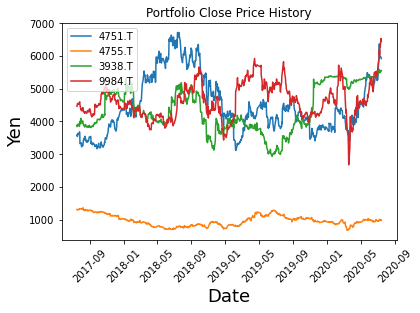

In [4]:
#タイトルの設定
title = "Portfolio Close Price History"

for i in financial_data.columns.values:
    plt.plot(financial_data[i], label = i)

plt.title(title)
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Yen', fontsize =18)
plt.legend( financial_data.columns.values, loc= 'upper left')
plt.show()

In [4]:
returns = financial_data.pct_change()
returns

,4751.T,3938.T,9984.T,4755.T
Date,,,,
2017-07-11,NaN,NaN,NaN,NaN
2017-07-12,-0.002755,0.000000,-0.006589,-0.005271
2017-07-13,0.012431,-0.007673,0.003980,0.000757
2017-07-14,-0.001364,-0.001289,0.002643,0.001891
2017-07-17,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2020-07-03,0.048689,0.018282,0.026288,-0.013598
2020-07-06,0.066071,0.003591,0.024230,0.020148
2020-07-07,0.067002,-0.001789,0.045961,0.039501


In [5]:
#トレードした日で掛ける
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,4751.T,3938.T,9984.T,4755.T
4751.T,0.183151,0.042523,0.054922,0.034311
3938.T,0.042523,0.116362,0.030919,0.017058
9984.T,0.054922,0.030919,0.180960,0.047647
4755.T,0.034311,0.017058,0.047647,0.110212


<h2>実際の銘柄で組み合わせの最適化をおこなう</h2>

In [6]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [7]:
mu = expected_returns.mean_historical_return(financial_data)#returns.mean() * 252
S = risk_models.sample_cov(financial_data) #Get the sample covariance matrix
ef = EfficientFrontier(mu, S)

In [8]:
weights = ef.min_volatility() #Minimize Risk, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('4751.T', 0.12611), ('3938.T', 0.36924), ('9984.T', 0.12179), ('4755.T', 0.38286)])
Expected annual return: 10.9%
Annual volatility: 24.2%
Sharpe Ratio: 0.37


(0.1094354986366973, 0.24212432224074545, 0.36937841605095384)

In [9]:
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('4751.T', 0.41345), ('3938.T', 0.33875), ('9984.T', 0.2478), ('4755.T', 0.0)])
Expected annual return: 21.9%
Annual volatility: 29.0%
Sharpe Ratio: 0.69


(0.21902590662510546, 0.2900489870214032, 0.686180319638279)